In [1]:
from faker import Faker
import faker.providers.credit_card
import pandas as pd
import numpy as np

# to make this notebook's output identical at every run
np.random.seed(42)



import random
from random import randint
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
### setup warnings
import warnings
warnings.filterwarnings("ignore")

Generating fake dataset:

In [2]:
fake1 = Faker(['en_US', 'en_UK'], use_weighting=True)
fake = Faker(['en_US', 'en_UK'], use_weighting=True, seed=1)
             
customers = {}

for i in range(0, 700):
    customers[i]={}
    customers[i]['cust_id'] = fake1.random_int(min=1, max=1000)
    customers[i]['credit_card_number'] = fake1.credit_card_number()
    customers[i]['transaction_date_time'] = fake.date_time_this_month()
    customers[i]['name'] = fake1.name()
    customers[i]['transaction_amount'] = fake1.random_int(min=100, max=1000)
customer_df = pd.DataFrame(customers).T

In [3]:
# assuming 3 different transaction type
types = np.random.randint(1,4,size=(700, 1))
transaction = pd.DataFrame(types, columns=['transaction_type'])
transaction

,transaction_type
0,3
1,1
2,3
3,3
4,1
...,...
695,2
696,3
697,1
698,1


Assuming 4 different location:
lets say, 

4 = Cinema,

In [4]:
# assuming 4 different location
loc = np.random.randint(1,5,size=(700, 1))
terminal_loc = pd.DataFrame(loc, columns=['terminal_loc'])
terminal_loc

,terminal_loc
0,3
1,3
2,1
3,1
4,2
...,...
695,1
696,4
697,3
698,3


In [5]:
data = pd.concat([customer_df, transaction, terminal_loc], axis='columns')
df = pd.DataFrame(data)
df.to_csv('fake_credit.csv', index=False)

In [6]:
df.head()

,cust_id,credit_card_number,transaction_date_time,name,transaction_amount,transaction_type,terminal_loc
0,524,4769528247162,2022-04-22 09:18:44,Felicia Jennings,459,3,3
1,561,4786614134088,2022-04-16 10:32:14,Michael Murray,768,1,3
2,285,3589116400859770,2022-04-25 02:55:53,Christopher Taylor,153,3,1
3,956,3563824491582793,2022-04-06 08:40:44,Mr Christopher Morgan,577,3,1
4,447,3595331957509940,2022-04-07 12:42:25,Harry Bradshaw,872,1,2


Suppose a customer did transactions on 
1 = Food Street,
2 = Gas/Feul,
3 = Pharmacy.

In [7]:
df["transaction_type"].value_counts()

1    252
3    226
2    222
Name: transaction_type, dtype: int64

In [8]:
#pd.set_option('display.max_rows', None)
df["transaction_amount"].value_counts()


737    4
875    4
914    4
371    4
296    3
      ..
992    1
362    1
256    1
791    1
138    1
Name: transaction_amount, Length: 488, dtype: int64

In [9]:
df[["transaction_date_time", 'transaction_type']].value_counts()

transaction_date_time  transaction_type
2022-04-01 00:08:30    1                   1
2022-04-17 22:17:48    2                   1
2022-04-17 18:16:34    2                   1
2022-04-17 19:13:17    2                   1
2022-04-17 19:43:35    2                   1
                                          ..
2022-04-09 12:26:24    2                   1
2022-04-09 13:41:16    1                   1
2022-04-09 14:20:31    3                   1
2022-04-09 14:21:07    2                   1
2022-04-25 11:05:02    3                   1
Length: 700, dtype: int64

In [10]:
df["terminal_loc"].value_counts()

2    184
1    182
3    179
4    155
Name: terminal_loc, dtype: int64

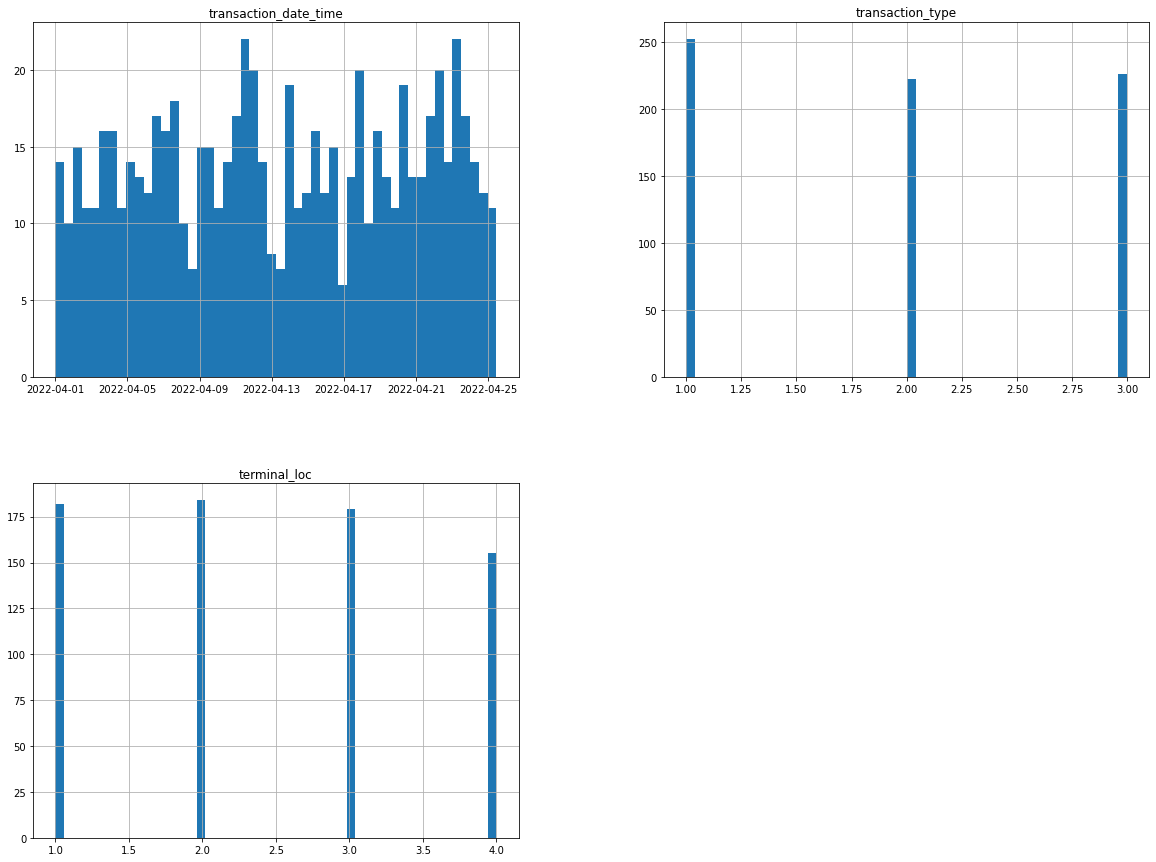

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='transaction_type', ylabel='transaction_amount'>

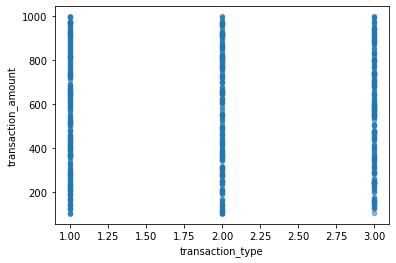

In [12]:
df.plot(kind="scatter", x="transaction_type", y="transaction_amount", alpha=0.5)

In [13]:
df.drop(['credit_card_number', 'name'], axis='columns', inplace=True)
df

,cust_id,transaction_date_time,transaction_amount,transaction_type,terminal_loc
0,524,2022-04-22 09:18:44,459,3,3
1,561,2022-04-16 10:32:14,768,1,3
2,285,2022-04-25 02:55:53,153,3,1
3,956,2022-04-06 08:40:44,577,3,1
4,447,2022-04-07 12:42:25,872,1,2
...,...,...,...,...,...
695,680,2022-04-13 23:34:49,165,2,1
696,5,2022-04-07 07:21:47,131,3,4
697,169,2022-04-07 04:05:12,140,1,3
698,151,2022-04-21 12:53:45,587,1,3


In [14]:
df.dtypes

cust_id                          object
transaction_date_time    datetime64[ns]
transaction_amount               object
transaction_type                  int64
terminal_loc                      int64
dtype: object

In [15]:
#df.astype({'transaction_date_time': 'object'}).dtypes

In [16]:
df

,cust_id,transaction_date_time,transaction_amount,transaction_type,terminal_loc
0,524,2022-04-22 09:18:44,459,3,3
1,561,2022-04-16 10:32:14,768,1,3
2,285,2022-04-25 02:55:53,153,3,1
3,956,2022-04-06 08:40:44,577,3,1
4,447,2022-04-07 12:42:25,872,1,2
...,...,...,...,...,...
695,680,2022-04-13 23:34:49,165,2,1
696,5,2022-04-07 07:21:47,131,3,4
697,169,2022-04-07 04:05:12,140,1,3
698,151,2022-04-21 12:53:45,587,1,3


In [17]:
from sklearn.ensemble import RandomForestRegressor

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

### Split data into training and test sets

In [18]:
X = df[['transaction_type', 'transaction_amount', 'cust_id']]

In [19]:
y = df[['terminal_loc']]



In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,
                                                    random_state=42, stratify=y)

In [21]:
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [22]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train)  

GaussianNB()

In [23]:
# Predicting the Test set results  
y_pred = classifier.predict(X_test)  

In [24]:
# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  
cm

array([[ 3, 19,  8,  6],
       [ 7, 15, 10,  5],
       [ 5, 14, 12,  5],
       [ 5, 12, 10,  4]])

In [25]:
accu_nb = accuracy_score(y_test, y_pred)*100

In [26]:
rec_nb = recall_score(y_test, y_pred, average='micro')*100

In [27]:
pre_nb = precision_score(y_test, y_pred, average='micro')*100

In [28]:
f1_nb = f1_score(y_test, y_pred, average='micro')*100

In [29]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accu_rfc = accuracy_score(y_test, y_pred)*100
pre_rfc = precision_score(y_test, y_pred, average='micro')*100
rec_rfc = recall_score(y_test, y_pred, average='micro')*100
f1_rfc = f1_score(y_test, y_pred, average='micro')*100

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accu_knn = accuracy_score(y_test, y_pred)*100
rec_knn = recall_score(y_test, y_pred, average='micro')*100
pre_knn = precision_score(y_test, y_pred, average='micro')*100
f1_knn = f1_score(y_test, y_pred, average='micro')*100

In [31]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accu_dtc = accuracy_score(y_test, y_pred)*100
rec_dtc = recall_score(y_test, y_pred, average='micro')*100
pre_dtc = precision_score(y_test, y_pred, average='micro')*100
f1_dtc = f1_score(y_test, y_pred, average='micro')*100

In [32]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_pred = lgr.predict(X_test)
accu_lgr = accuracy_score(y_test, y_pred)*100
rec_lgr = recall_score(y_test, y_pred, average='micro')*100
pre_lgr = precision_score(y_test, y_pred, average='micro')*100
f1_lgr = f1_score(y_test, y_pred, average='micro')*100

In [33]:
### dataframe with evaluation metrics accuracy, f1-score, recall, precision
clf = ["GNB", "RFC", "KNN", "DTC", "LogR"]
acc = [accu_nb, accu_rfc, accu_knn, accu_dtc, accu_lgr]
rec = [rec_nb, rec_rfc, rec_knn, rec_dtc, rec_lgr]
pre = [pre_nb, pre_rfc, pre_knn, pre_dtc, pre_lgr]
f1 = [f1_nb, f1_rfc, f1_knn, f1_dtc, f1_lgr]

score = pd.DataFrame({
    "classifier": clf,
    "accuracy": acc,
    "recall": rec,
    "precision": pre,
    "f1_score": f1,
    
})
score.set_index("classifier", inplace = True)
score = score.transpose()
score["high score"] = score[["GNB", "RFC", "KNN", "DTC", "LogR"]].idxmax(axis=1)
display("Algorithm Performance", score)

'Algorithm Performance'

classifier,GNB,RFC,KNN,DTC,LogR,high score
accuracy,24.285714,18.571429,18.571429,29.285714,25.0,DTC
recall,24.285714,18.571429,18.571429,29.285714,25.0,DTC
precision,24.285714,18.571429,18.571429,29.285714,25.0,DTC
f1_score,24.285714,18.571429,18.571429,29.285714,25.0,DTC
